Importing Libraries

In [15]:
import numpy as np 
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Reading Dataset


In [3]:
data=pd.read_csv("/content/Loan_Prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
numerical_features = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include = [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Checking for Null Values

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing Null Values with Mode and Median

In [6]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Verifying

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Conversion to Numerical Values

In [8]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data['Dependents'].replace({'0':0,'1':1,'2':2,'3':3},inplace=True)
data['Married'].replace({'Yes':1,'No':0},inplace=True)
data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
data['Property_Area'].replace({'Urban':2,'Rural':0,'Semiurban':1},inplace=True)
data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [9]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype("int64")
data['LoanAmount']=data['LoanAmount'].astype("int64")
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype("int64")
data['Credit_History']=data['Credit_History'].astype("int64")

Label Encoding

In [10]:
le = LabelEncoder()
data['Loan_ID'] = le.fit_transform(data.Loan_ID)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0,120,360,1,2,1
1,1,1,1,1,1,0,4583,1508,128,360,1,0,0
2,2,1,1,0,1,1,3000,0,66,360,1,2,1
3,3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,4,1,0,0,1,0,6000,0,141,360,1,2,1


In [11]:
smote = SMOTETomek(0.90)

y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [12]:
x_bal,y_bal = smote.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    357
0    314
Name: Loan_Status, dtype: int64


In [13]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)
x_bal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.725745,0.522728,-1.156710,-0.715897,0.607773,-0.330289,0.080119,-0.569144,-0.308502,0.271876,0.582513,1.372305
1,-1.719960,0.522728,0.864521,0.317150,0.607773,-0.330289,-0.131341,-0.026160,-0.218033,0.271876,0.582513,-1.171388
2,-1.714175,0.522728,0.864521,-0.715897,0.607773,3.027650,-0.395749,-0.569144,-0.919170,0.271876,0.582513,1.372305
3,-1.708390,0.522728,0.864521,-0.715897,-1.645352,-0.330289,-0.465401,0.279899,-0.308502,0.271876,0.582513,1.372305
4,-1.702605,0.522728,-1.156710,-0.715897,0.607773,-0.330289,0.105341,-0.569144,-0.071020,0.271876,0.582513,1.372305


Splitting of Data into Train and Test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.33, random_state = 30)

Decision Tree Model

In [17]:
model = DecisionTreeClassifier(max_depth=5,splitter='best',criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
y_predict= model.predict(x_test)
y_predict_train = model.predict(x_train)

In [19]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.7657657657657657
Training accuracy=  0.8396436525612472


In [20]:
pd.crosstab(y_test,y_predict)

col_0,0,1
Loan_Status,,
0,65,36
1,16,105


In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       101
           1       0.74      0.87      0.80       121

    accuracy                           0.77       222
   macro avg       0.77      0.76      0.76       222
weighted avg       0.77      0.77      0.76       222



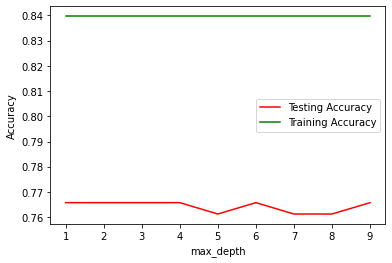

In [22]:
import matplotlib.pyplot as plt

max_depth = np.arange(1,10)
train_accuracy = np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))

for i, k in enumerate(max_depth):
    model = DecisionTreeClassifier(max_depth=5,splitter='best',criterion='entropy')
    model.fit(x_train,y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = model.score(x_train, y_train)
    test_accuracy[i] = model.score(x_test, y_test)

plt.plot(max_depth, test_accuracy, label = 'Testing Accuracy', color ='red')
plt.plot(max_depth, train_accuracy, label = 'Training Accuracy', color ='green')
  
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()